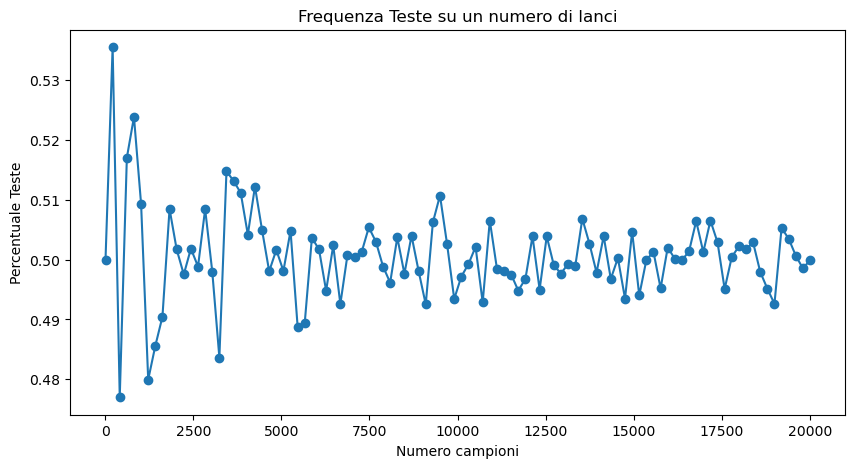

In [20]:
#Esercizio 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

vettore_possibilita = ['T' , 'C']
vettore_probabilita = [0.5 , 0.5]

def lancio_moneta(n):

    vettore_risultati = []
    vettore_risultati = np.random.choice(vettore_possibilita, n, vettore_probabilita)

    counter = np.sum(vettore_risultati == 'T')

    return counter/n

vettore_campioni = np.linspace(10, 20000, 100)
vettore_percentuali = []

for i in range(100):
    
    percentuale = lancio_moneta(int(vettore_campioni[i]))
    vettore_percentuali.append(percentuale)

plt.figure(figsize=(10,5))
plt.plot(vettore_campioni,vettore_percentuali,marker='o')
plt.title("Frequenza Teste su un numero di lanci")
plt.xlabel("Numero campioni")
plt.ylabel("Percentuale Teste")
plt.show()    



Le righe e le colonne sono: (891, 12)
Stato iniziale:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Sostituisco valori nulli 'Embarked':
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
Elimino Null su 'Age':
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64
Controllo righe duplicate
0
Mediana eta:
28.0
Media età divise per classe:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


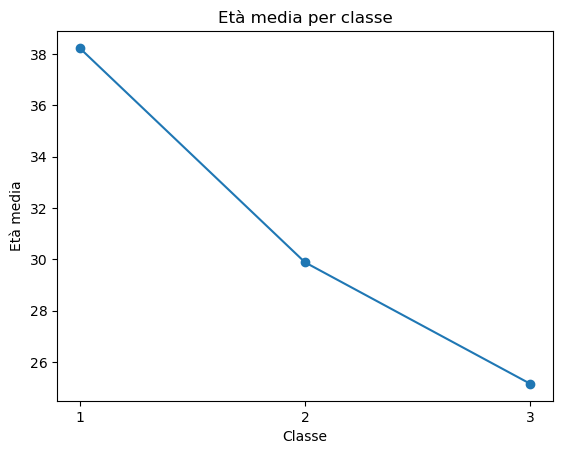

In [100]:
#Esercizio 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

print("Le righe e le colonne sono:" ,df.shape)

valori_mancanti = df.isnull().sum()
print("Stato iniziale:") 
print(valori_mancanti)

valore_frequente_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(valore_frequente_embarked)
print("Sostituisco valori nulli 'Embarked':")
print(df.isnull().sum())

df = df.dropna(subset=['Age'])
print("Elimino Null su 'Age':")
print(df.isnull().sum())

righe_duplicate = df.duplicated().sum()
print("Controllo righe duplicate")
print(righe_duplicate)

valore_medio_eta = df['Age'].median()
print("Mediana eta:")
print(valore_medio_eta)
df['Age'] = df['Age'].fillna(valore_medio_eta)
eta_media_per_classe = df.groupby('Pclass')['Age'].mean()
print("Media età divise per classe:")
print(eta_media_per_classe)

plt.plot(eta_media_per_classe.index, eta_media_per_classe.values, marker='o')
plt.title("Età media per classe")
plt.xlabel("Classe")
plt.ylabel("Età media")
plt.xticks([1, 2, 3])
plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
Lunghezza media per specie:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64
Larghezza media per specie:
species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64


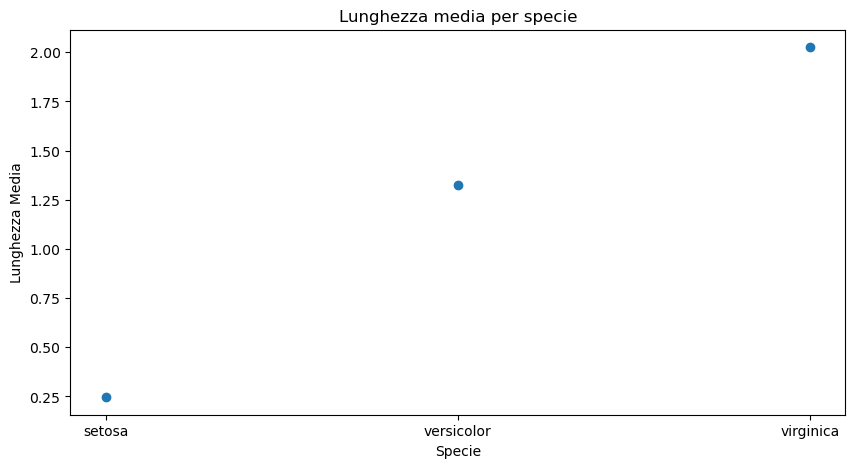

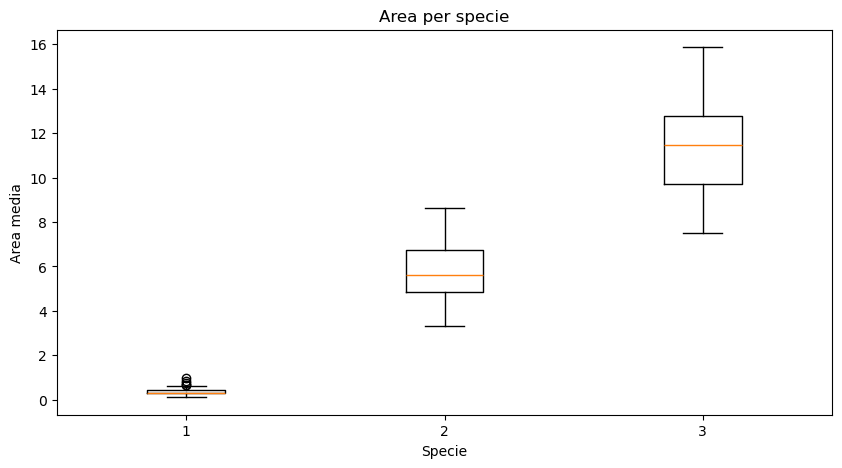

In [126]:
#Esercizio 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
print(df.head())

campioni_per_specie = df['species'].value_counts()
print(campioni_per_specie)

lunghezza_media_per_specie = df.groupby('species')['petal_length'].mean()
print("Lunghezza media per specie:")
print(lunghezza_media_per_specie)
larghezza_media_per_specie = df.groupby('species')['petal_width'].mean()
print("Larghezza media per specie:")
print(larghezza_media_per_specie)

plt.figure(figsize=(10,5))
plt.scatter(larghezza_media_per_specie.index,larghezza_media_per_specie.values,marker='o')
plt.title("Lunghezza media per specie")
plt.ylabel("Lunghezza Media")
plt.xlabel("Specie")
plt.show()

df['area'] = df['petal_length'] * df['petal_width']
area_media_per_specie = df.groupby('species')['area'].mean()

plt.figure(figsize=(10,5))
plt.boxplot([df[df['species'] == specie]['area']
           for specie in df['species'].unique()])
plt.title("Area per specie")
plt.xlabel("Specie")
plt.ylabel("Area media")
plt.show()